In [1]:
# Change to project root
import os
os.chdir('..')

In [2]:
# Autoreload
%load_ext autoreload
%autoreload 2

In [3]:
import tensorflow as tf
import numpy as np

In [4]:
min_trans = -4
max_trans = 4
parallel_calls = 8

# Load the data

In [5]:
from transforming_autoencoders import mnist, data
mnist_data = mnist.MNIST('data')

def train_input_fn(batch_size):
    return mnist_data.train_input_fn()(batch_size,
                                       lambda:data.translation_fn(batch_size, min_trans,max_trans),
                                       parallel_calls)
def eval_input_fn(batch_size):
    return mnist_data.eval_input_fn()(batch_size,
                                      lambda:data.translation_fn(batch_size, min_trans,max_trans),
                                      parallel_calls)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


# Create the estimator

In [6]:
from transforming_autoencoders import trans_autoencoder_estimator
model = trans_autoencoder_estimator.create_transforming_autoencoder(model_dir='model/translation-2',
                                                                    num_capsules=30,
                                                                    num_rec=50,
                                                                    num_gen=50,
                                                                    trans_size=2,
                                                                    trans_fn='translation')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'model/translation-2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff8b0826390>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Train the model

In [7]:
batch_size = 64
epochs = 6
steps = int(mnist_data.train_size() * epochs / batch_size)
model.train(input_fn=lambda:train_input_fn(batch_size), steps=steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/translation-2/model.ckpt-5156
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5157 into model/translation-2/model.ckpt.
INFO:tensorflow:loss = 0.037233498, step = 5157
INFO:tensorflow:global_step/sec: 44.953
INFO:tensorflow:loss = 0.036099102, step = 5257 (2.225 sec)
INFO:tensorflow:global_step/sec: 74.3177
INFO:tensorflow:loss = 0.034274958, step = 5357 (1.345 sec)
INFO:tensorflow:global_step/sec: 74.3093
INFO:tensorflow:loss = 0.03699394, step = 5457 (1.346 sec)
INFO:tensorflow:global_step/sec: 73.6407
INFO:tensorflow:loss = 0.034933787, step = 5557 (1.358 sec)
INFO:tensorflow:global_step/sec: 74.1461
INFO:tensorflow:loss = 0.03635394, step = 5657 (1.349 sec)
INFO:tensorflow:global_step/sec: 73.923
INFO:tensorflo

# Evaluate the model

In [8]:
test_data = eval_input_fn(4)
with tf.Session() as sess:
    img, trans, expec = sess.run([test_data[0]['image'],
                                 test_data[0]['transformation'],
                                 test_data[1]])

In [9]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"image": img, "transformation": trans},
    num_epochs=1,
    shuffle=False)
yhat = list(model.predict(input_fn=predict_input_fn))
pred = np.array(list(map(lambda x: x['out_image'], yhat)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/translation-2/model.ckpt-10312
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


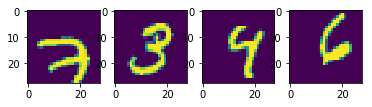

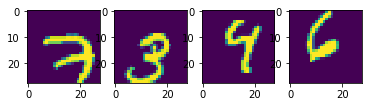

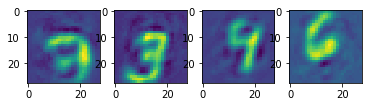

[[ 1.4266901  -0.45416164]
 [-1.5565147   3.5318766 ]
 [-0.0660181  -1.9413929 ]
 [-4.96278    -1.836545  ]]


In [11]:
from transforming_autoencoders import plot
plot.plot_some(img)
plot.plot_some(expec)
plot.plot_some(pred)
print(trans)